# Data Cleaning 

**Bad data could be:**

1. Worng data

2. Data in wrong format

3. Duplicates

4. Empty cells/missing values

5. Outliers

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.DataFrame({"age":[15,18,"18",19.4,"20+"],
                   "gender":["male","female","female","female","male"]})
df

,age,gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20+,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     5 non-null      object
 1   gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [7]:
df['age'].unique()

array([15, 18, '18', 19.4, '20+'], dtype=object)

**1. Wrong data**

- Solution: Replace

In [9]:
df['age'].replace({"20+":20}, inplace=True)
df

,age,gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20,male


**2. Wrong data type**

- Solution: convert the datatype

In [13]:
 df['age'] = df['age'].astype('float')
df

,age,gender
0,15.0,male
1,18.0,female
2,18.0,female
3,19.4,female
4,20.0,male


**3. Duplicates**

- Solution: Remove

In [14]:
# to chech the duplicated values or records
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [15]:
df.duplicated().sum()

1

In [17]:
# total no. of duplicates in given data 
df.duplicated().sum()

1

In [18]:
# to extrat duplicate records
df[df.duplicated()]

,age,gender
2,18.0,female


In [19]:
# to extract non duplicated records
df[~df.duplicated()]

,age,gender
0,15.0,male
1,18.0,female
3,19.4,female
4,20.0,male


In [21]:
df

,age,gender
0,15.0,male
1,18.0,female
2,19.4,female
3,20.0,male


In [20]:
# to remove the duplicates
df.drop_duplicates(inplace=True,ignore_index=True)
df

,age,gender
0,15.0,male
1,18.0,female
2,19.4,female
3,20.0,male


# Missing values

- Solution : Either remove or replace 

In [23]:
df = pd.DataFrame({"age":[15,np.nan,24,19,20,22],
                   "gender":["male",np.nan,"female","female","male",np.nan]})

df                

,age,gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,male
5,22.0,NaN


In [24]:
# to check the missing values reords
df.isnull()

,age,gender
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,True


In [25]:
# to check total missing values 
df.isnull().sum()

age       1
gender    2
dtype: int64

In [26]:
# to chech the percentage of missing values in each variables

df.isnull().sum()/len(df)*100

age       16.666667
gender    33.333333
dtype: float64

**Option 1.Remove the rows that contain missing values** 

In [27]:
df2 = df.dropna()
df2

,age,gender
0,15.0,male
2,24.0,female
3,19.0,female
4,20.0,male


In [29]:
df1 = df.drop(columns=["gender"]) 
df1

,age
0,15.0
1,NaN
2,24.0
3,19.0
4,20.0
5,22.0


**Option 2: Replace the nan values**

- fill with value

- Continous variables----> Replace with either Mean or Median

- Discrete variables-----> Replace with Mode

In [32]:
# to fill with a value

df["age"].mean()
df["age"].fillna(20)

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: age, dtype: float64

In [35]:
# to fill with a mean 
df["age"].mean()

df['age'].fillna(df["age"].mean())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: age, dtype: float64

In [38]:
# to fill with median
df['age'].fillna(df['age'].median())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: age, dtype: float64

In [40]:
# to fill with mode
df['gender'].fillna(df['gender'].mode())

0      male
1      male
2    female
3    female
4      male
5       NaN
Name: gender, dtype: object

# Outliers

In [41]:
df = pd.DataFrame({"marks":[10,11,12,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


**Various ways of finding the outlier.**

1. Boxplot

Identifying Outliers based on boxplot

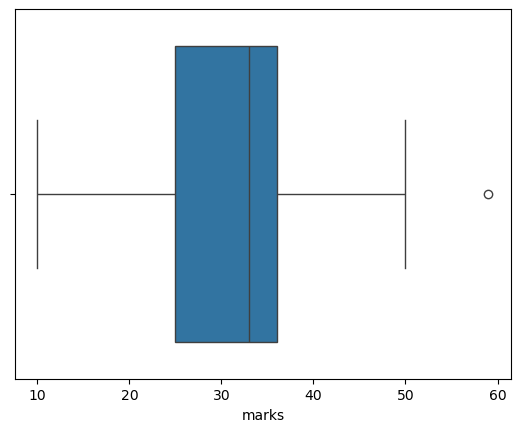

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['marks'])
plt.show()

Identifying Outliers based on IQR

In [50]:
# caluclate Q1
Q1 = df['marks'].quantile(0.25)
print('Q1:',Q1)

# caluclate the Q3
Q3 = df['marks'].quantile(0.75)
print('Q3:',Q3)

#caluclate the IRQ
IQR = Q3 - Q1
print('IQR:',IQR)

#caluclate lower limit of otliear
lower_limit = Q1 -(IQR* 1.5)
print('lower limit:',lower_limit)

# caluclate upper limit of outlier
upper_limit = Q3 +(IQR* 1.5)
print('upper limit:',upper_limit)



Q1: 25.0
Q3: 36.0
IQR: 11.0
lower limit: 8.5
upper limit: 52.5


**Outliers Data**

In [52]:
df[(df['marks']<lower_limit) | (df['marks']>upper_limit)]

,marks
14,59


**Solution : 3R Technique**

1. Remove (remove the outliers from our dataset)

2. Replace the outliers
     
      - Recitify or Replace--->(data entry error)--->Ask and conform it from the data engineering team.

      - Replace with upper limit & lower limit based on IQR

3. Retain (consider for analysis)---> Treat them separately




**Remove**

In [53]:
df.drop(index=[14])

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


**Replace**

- based on confirmation frm data engineer team/ based on research/ based on domain exertise

    Replace based on statistics

- **Winsorization** - replacing the outliers statiscally with lower_limit & upper_limit values

In [54]:
df['marks'] = df['marks'].clip(lower=8.5,upper=52.5)
df

,marks
0,10.0
1,11.0
2,12.0
3,25.0
4,25.0
5,27.0
6,31.0
7,33.0
8,34.0
9,34.0


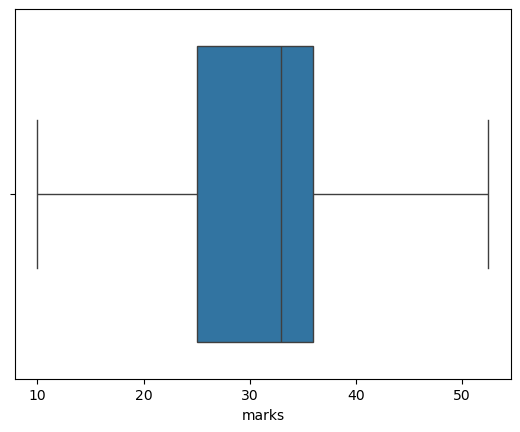

In [56]:
sns.boxplot(x=df["marks"])
plt.show()